In [1]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data/spotify-2023.csv', encoding='utf-8', encoding_errors='replace')

In [3]:
export = []

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
df['in_shazam_charts'].describe()

count     903
unique    198
top         0
freq      344
Name: in_shazam_charts, dtype: object

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [7]:
# Some columns have non numeric characters in them, need to find out why, and what they are before I convert them
#df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)

all_values = ''.join(df['in_shazam_charts'].astype(str))

non_numeric_chars = set(re.findall(r'\D', all_values))

print(non_numeric_chars)

{'n', ',', 'a'}


In [8]:
df[df['in_shazam_charts'].str.contains('a', na = True)].head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,198,863,46,NaN,174,F#,Minor,52,66,73,34,0,31,6
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1813673666,250,122,"3,394",19,NaN,123,E,Minor,45,13,54,70,0,9,4
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,386,144,707,28,NaN,81,B,Major,76,53,53,44,0,9,9
73,Sweater Weather,The Neighbourhood,1,2012,5,14,16413,61,2282771485,166,87,"1,056",1,NaN,124,A#,Major,61,41,81,5,2,10,3


In [9]:
df[df['in_shazam_charts'].isnull()].head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,198,863,46,NaN,174,F#,Minor,52,66,73,34,0,31,6
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1813673666,250,122,"3,394",19,NaN,123,E,Minor,45,13,54,70,0,9,4
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,386,144,707,28,NaN,81,B,Major,76,53,53,44,0,9,9
73,Sweater Weather,The Neighbourhood,1,2012,5,14,16413,61,2282771485,166,87,"1,056",1,NaN,124,A#,Major,61,41,81,5,2,10,3


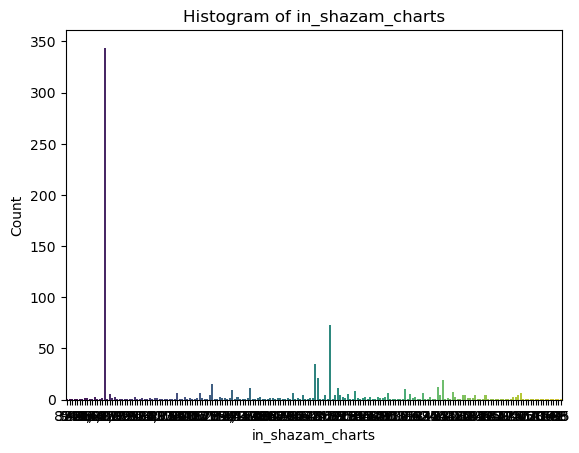

In [10]:
#In a normal analysis work, I would not do this. I would look at the distribution of the columns with missing values, look 
# to see if they are correlated  with other columns, and then would select a method to either impute them, or fill them 
# with another type of value... this is bad practice and I am fully aware... however for the scope of the assignment and
# and the time constraint that is given I will just rid the dataset of null values...
#df.dropna(inplace = True)

def barChart(col, df):
    sns.countplot(x=df[col], palette='viridis')

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')
    plt.show()

barChart('in_shazam_charts', df)


In [11]:
df['in_shazam_charts'].value_counts()

in_shazam_charts
0      344
1       73
2       35
3       21
4       19
      ... 
115      1
230      1
169      1
529      1
95       1
Name: count, Length: 198, dtype: int64

In [12]:
temp = df[df['in_shazam_charts'] == '0']

temp['in_apple_charts'].value_counts()

in_apple_charts
0     83
1     28
3     18
2     13
5     10
      ..
16     1
77     1
48     1
38     1
33     1
Name: count, Length: 90, dtype: int64

In [13]:
temp['in_deezer_charts'].value_counts()

in_deezer_charts
0     277
1      30
2      12
6       5
7       3
5       2
4       2
3       2
12      2
17      1
9       1
38      1
31      1
24      1
19      1
13      1
16      1
11      1
Name: count, dtype: int64

In [14]:
df['in_shazam_charts'].isna().sum()

50

In [15]:
def replace_zero(row):
    if row['in_shazam_charts'] == '0' or pd.isna(row['in_shazam_charts']) :
        row['in_shazam_charts'] = row['in_apple_charts']

    if row['in_deezer_charts'] == '0' or pd.isna(row['in_deezer_charts']):
        row['in_deezer_charts'] = row['in_apple_charts']

    return row



df['in_shazam_charts'] = df['in_shazam_charts'].astype(str).str.replace(',', '').replace('nan', '0').astype(int)
df['in_deezer_charts'] = df['in_deezer_charts'].astype(str).str.replace(',', '').replace('nan', '0').astype(int)
df['in_apple_charts'] = df['in_apple_charts'].astype(str).str.replace(',', '').replace('nan', '0').astype(int)

df = df.apply(replace_zero, axis=1)

print(df['in_shazam_charts'].isna().sum())

0


                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

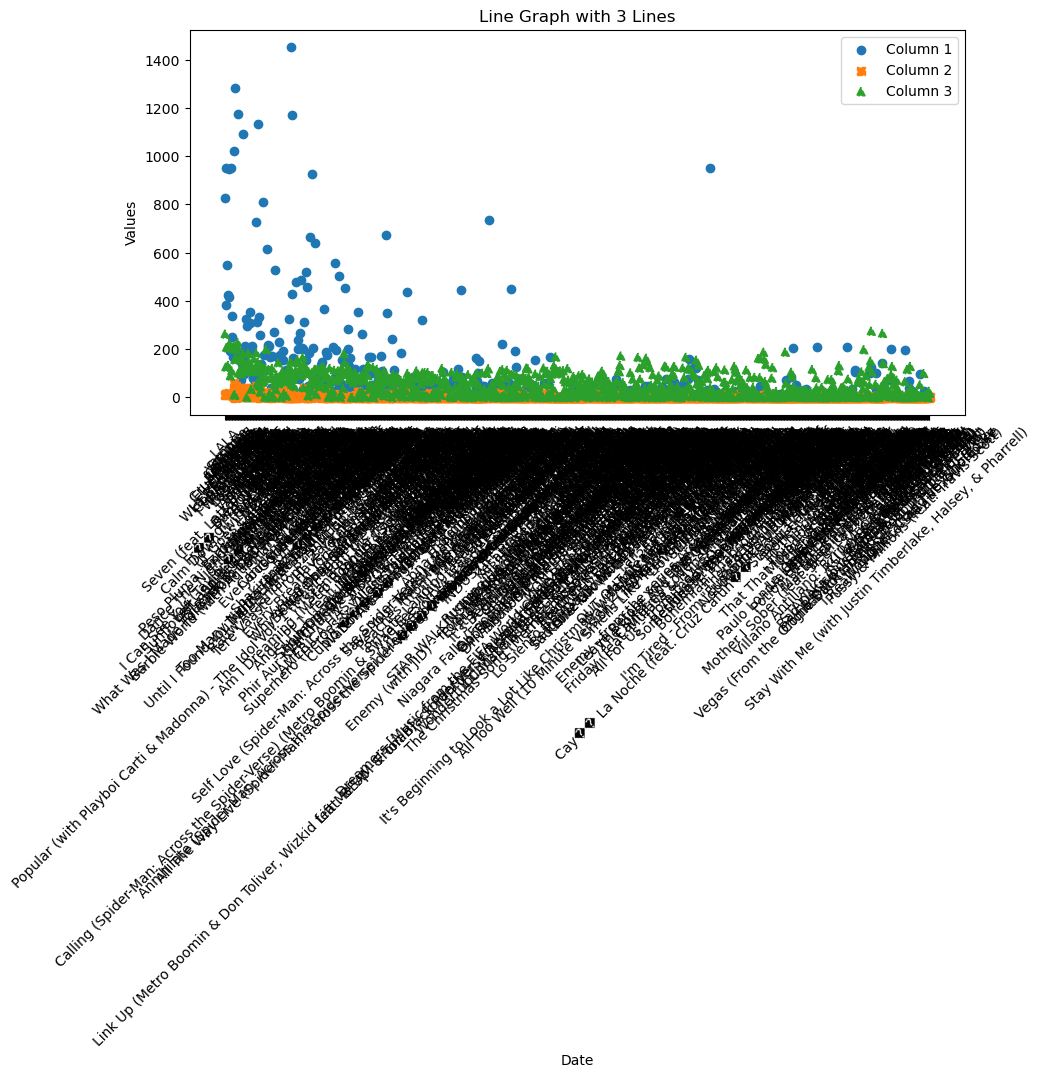

In [16]:
def filter_convertible_rows(df, columns, dtype):
    """
    Filters rows where the specified columns can be successfully converted to the given dtype.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        columns (list): List of column names to check for convertibility.
        dtype (type): Target data type (e.g., int, float, str).
    
    Returns:
        pd.DataFrame: Filtered DataFrame with only convertible rows.
    """
    mask = pd.Series(True, index=df.index)
    
    for col in columns:
        try:
            converted = pd.to_numeric(df[col], errors='coerce') if dtype in [int, float] else df[col].astype(dtype, errors='ignore')
            mask &= converted.notna() if dtype in [int, float] else converted.apply(lambda x: isinstance(x, dtype))
        except Exception:
            mask &= False  # If conversion fails, remove all rows
    
    return df[mask]


filtered_df = filter_convertible_rows(df, ['in_shazam_charts', 'in_deezer_charts', 'in_apple_charts'], int)
print(filtered_df)


plt.figure(figsize=(10, 5))
plt.scatter(filtered_df['track_name'], filtered_df['in_shazam_charts'], label='Column 1', marker='o', linestyle='-')
plt.scatter(filtered_df['track_name'], filtered_df['in_deezer_charts'], label='Column 2', marker='s', linestyle='--')
plt.scatter(filtered_df['track_name'], filtered_df['in_apple_charts'], label='Column 3', marker='^', linestyle='-.')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Line Graph with 3 Lines')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()

Apple charts seem to not have any patters, so I will fill in missing values from the other 2 with the apple chart value

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [18]:

df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '').astype(int)
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)


In [19]:
df['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [20]:
idx = df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'].index[0]

df.drop(index=idx, inplace = True)

In [21]:

df['streams'] = df['streams'].str.replace(',', '').astype('int64')
df['streams'] = df['streams'].astype('int64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    int32 
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      952 non-null    int64 
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    object


In [23]:
df['key'].value_counts()

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      74
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

In [24]:
df['key'].isna().sum()

95

In [25]:
df = df.dropna()

Cant imputer or anything for key, so imma delete these rows.

In [26]:
df.head(30)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            857 non-null    object
 1   artist(s)_name        857 non-null    object
 2   artist_count          857 non-null    int64 
 3   released_year         857 non-null    int64 
 4   released_month        857 non-null    int64 
 5   released_day          857 non-null    int64 
 6   in_spotify_playlists  857 non-null    int64 
 7   in_spotify_charts     857 non-null    int64 
 8   streams               857 non-null    int64 
 9   in_apple_playlists    857 non-null    int64 
 10  in_apple_charts       857 non-null    int64 
 11  in_deezer_playlists   857 non-null    int32 
 12  in_deezer_charts      857 non-null    int64 
 13  in_shazam_charts      857 non-null    int64 
 14  bpm                   857 non-null    int64 
 15  key                   857 non-null    object


In [28]:
# corr_matr = df.corr()
# plt.figure(figsize=(12, 10))

# sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# plt.title('Correlation Heatmap All Features')

# plt.show()


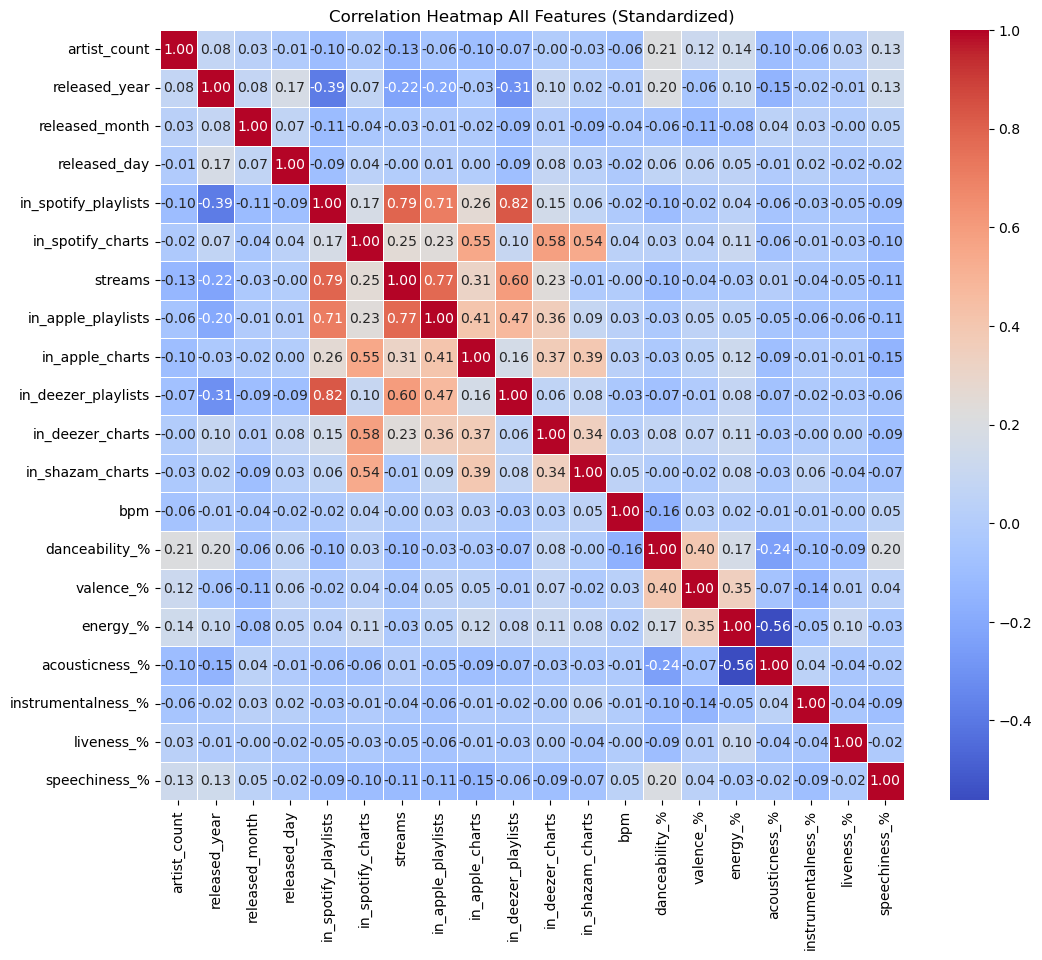

In [29]:
numeric_df = df.select_dtypes(include=['number'])

scaler = StandardScaler()
standard_data = scaler.fit_transform(numeric_df)

standard_df = pd.DataFrame(standard_data, columns=numeric_df.columns)

plt.figure(figsize=(12, 10))

corr_matr = standard_df.corr()

sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap All Features (Standardized)')

plt.show()


In [30]:
#Chose 8 variables 
#streams, in_spotify_playlists, in_apple_playlists, in_deezer_playlists, danceability_%, valence_%, energy_%, acousticness_%



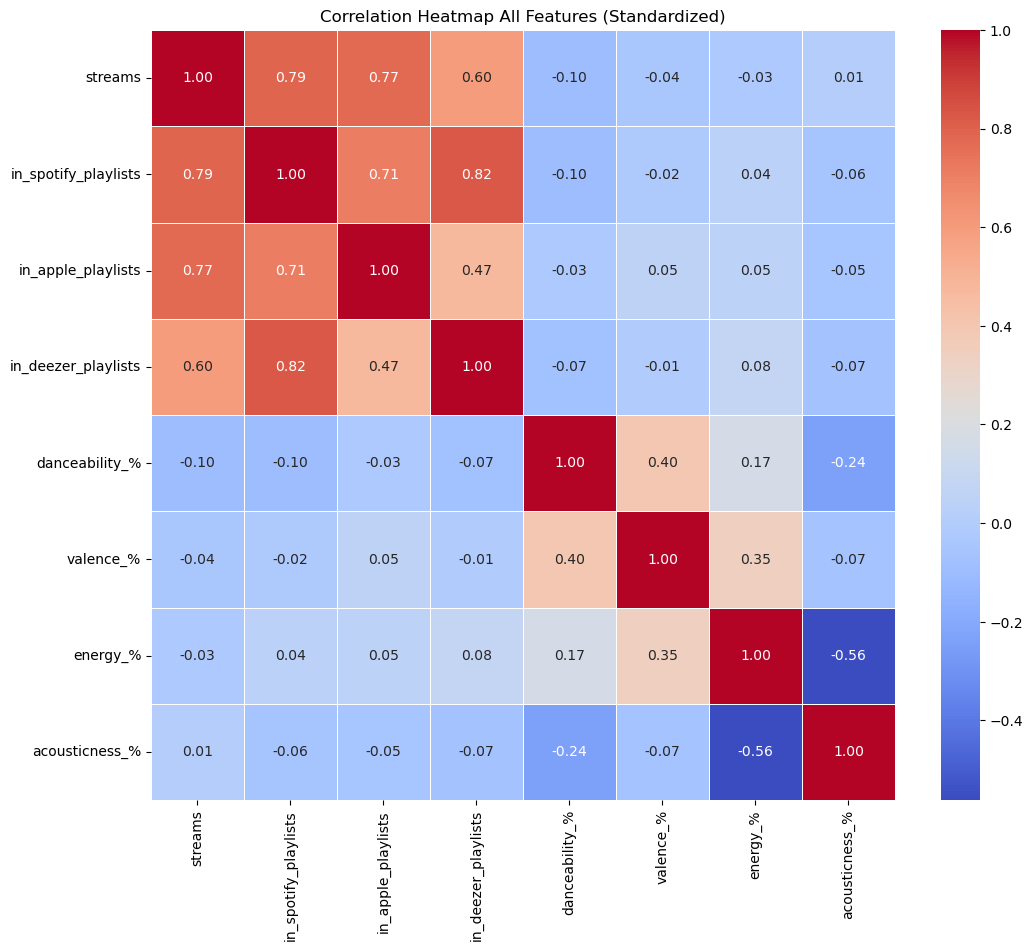

In [31]:
numeric_df = df.select_dtypes(include=['number'])

numeric_df = numeric_df[['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']]

scaler = StandardScaler()
standard_data = scaler.fit_transform(numeric_df)

standard_df = pd.DataFrame(standard_data, columns=numeric_df.columns)

plt.figure(figsize=(12, 10))

corr_matr = standard_df.corr()

sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap All Features (Standardized)')

plt.show()

In [32]:
#Saving in variable to export to csv later on
export.append(corr_matr.copy(deep= True))

In [33]:
#in_deezer and in spotify ... in_spotify is A1

#Generation of Axes based on chain greatest correlations 

A1 = 'in_spotify_playlists'
A2 = 'in_deezer_playlists'
A3 = 'streams'
A4 = 'in_apple_playlists'
A5 = 'acousticness_%'
A6 = 'energy_%'
A7 = 'valence_%'
A8 = 'danceability_%'
C1 = 'key'
C2 = 'released_month'

In [34]:
#Now make scatterplots

in_spotify_playlists     int64
in_deezer_playlists      int32
streams                  int64
in_apple_playlists       int64
acousticness_%           int64
key                     object
released_month           int64
dtype: object


f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

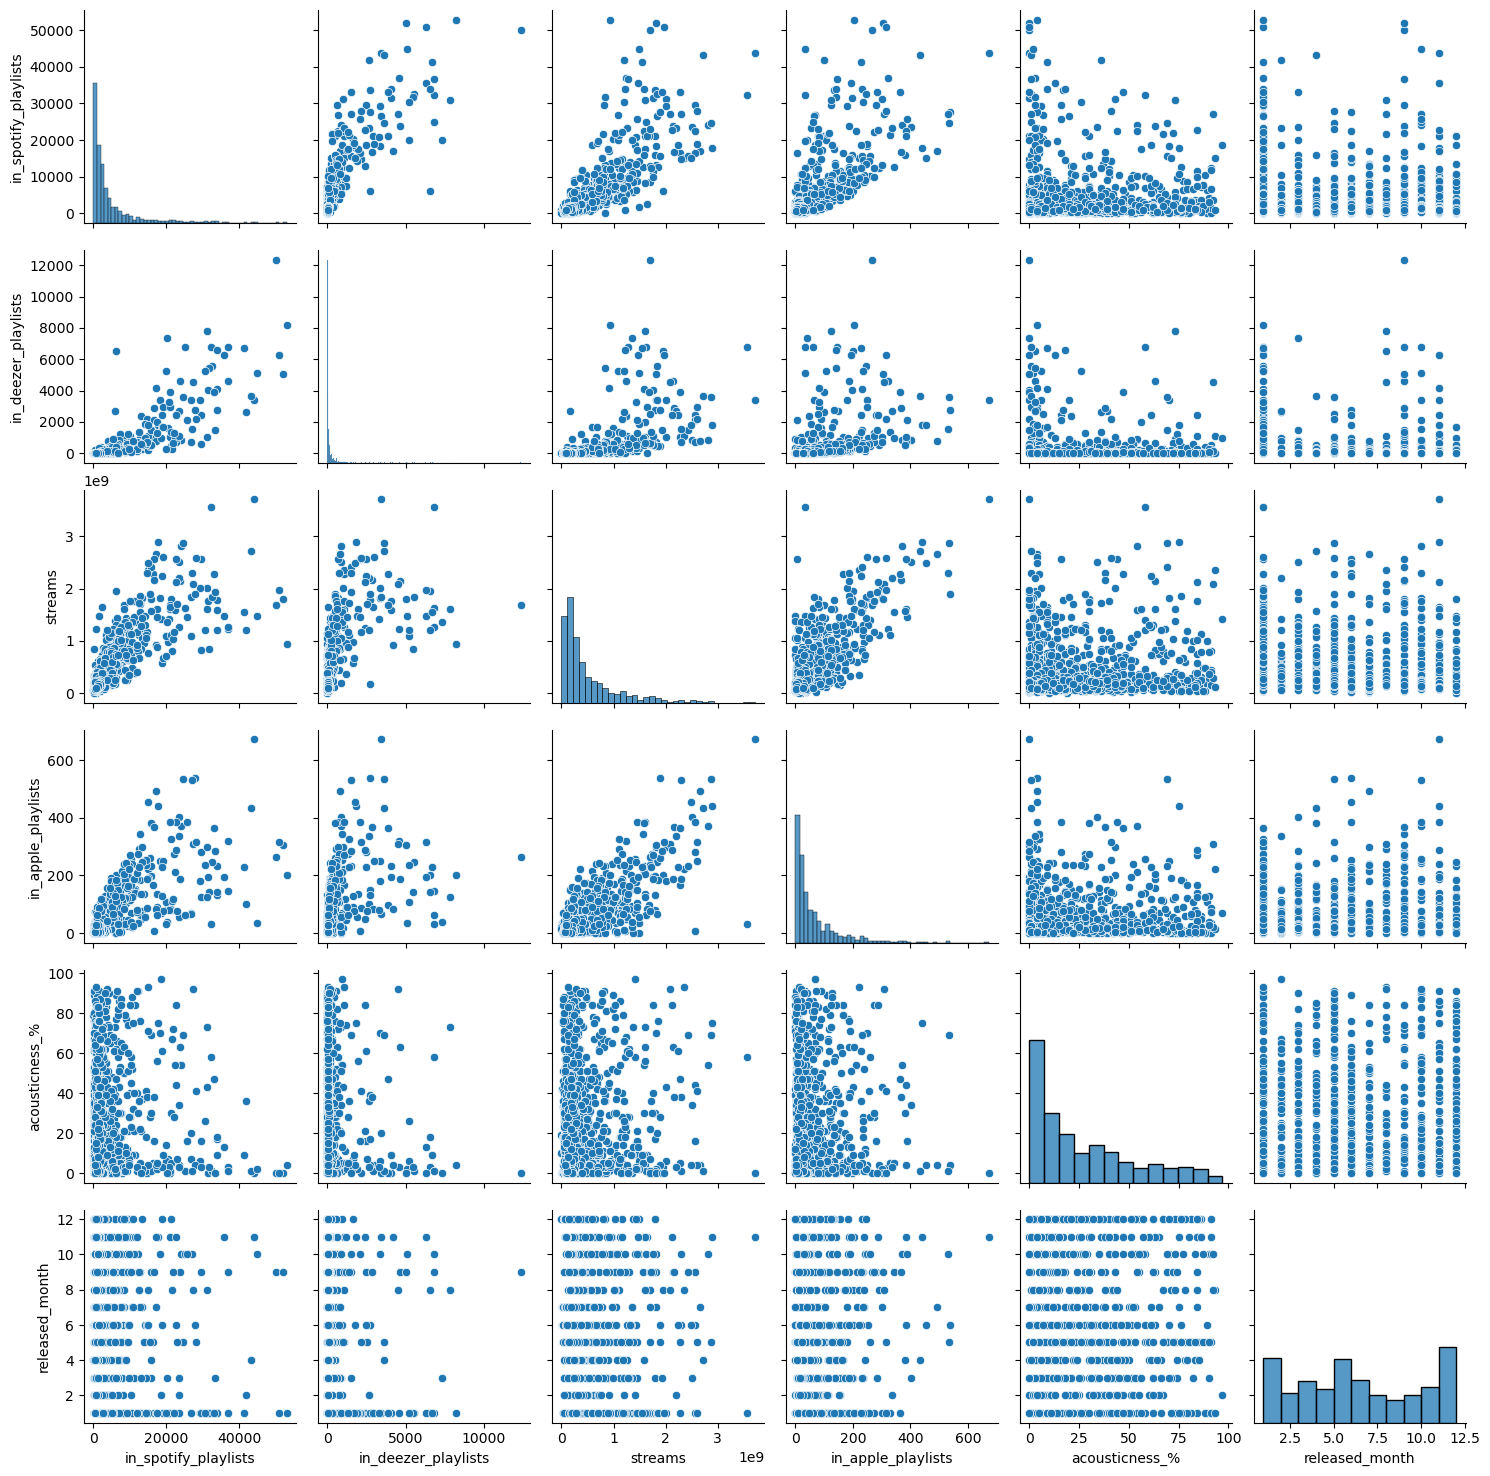

In [35]:
A_cols = [A1, A2, A3, A4, A5, A6, A7, A8, C1, C2]
A_cols_scatt = [A1, A2, A3, A4, A5, C1, C2]

#A_cols_scatt = [A1, A2, A3, A4, A5]


df_scatter = df[A_cols_scatt]

print(df_scatter.dtypes)

sns.pairplot(df_scatter)
plt.show()

In [36]:
export.append(df_scatter.copy(deep=True))

In [37]:
df_scatter

,in_spotify_playlists,in_deezer_playlists,streams,in_apple_playlists,acousticness_%,key,released_month
0,553,45,141381703,43,31,B,7
1,1474,58,133716286,48,7,C#,3
2,1397,91,140003974,94,17,F,6
3,7858,125,800840817,116,11,A,8
4,3133,87,303236322,84,14,A,5
...,...,...,...,...,...,...,...
948,953,37,91473363,61,57,A,11
949,1180,8,121871870,4,83,F#,10
950,573,7,73513683,2,4,C#,11
951,1320,17,133895612,29,8,C#,10


In [38]:
from pandas.plotting import parallel_coordinates

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            857 non-null    object
 1   artist(s)_name        857 non-null    object
 2   artist_count          857 non-null    int64 
 3   released_year         857 non-null    int64 
 4   released_month        857 non-null    int64 
 5   released_day          857 non-null    int64 
 6   in_spotify_playlists  857 non-null    int64 
 7   in_spotify_charts     857 non-null    int64 
 8   streams               857 non-null    int64 
 9   in_apple_playlists    857 non-null    int64 
 10  in_apple_charts       857 non-null    int64 
 11  in_deezer_playlists   857 non-null    int32 
 12  in_deezer_charts      857 non-null    int64 
 13  in_shazam_charts      857 non-null    int64 
 14  bpm                   857 non-null    int64 
 15  key                   857 non-null    object


C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_115024\3983208968.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parallel['Class'] = 'Bruh'


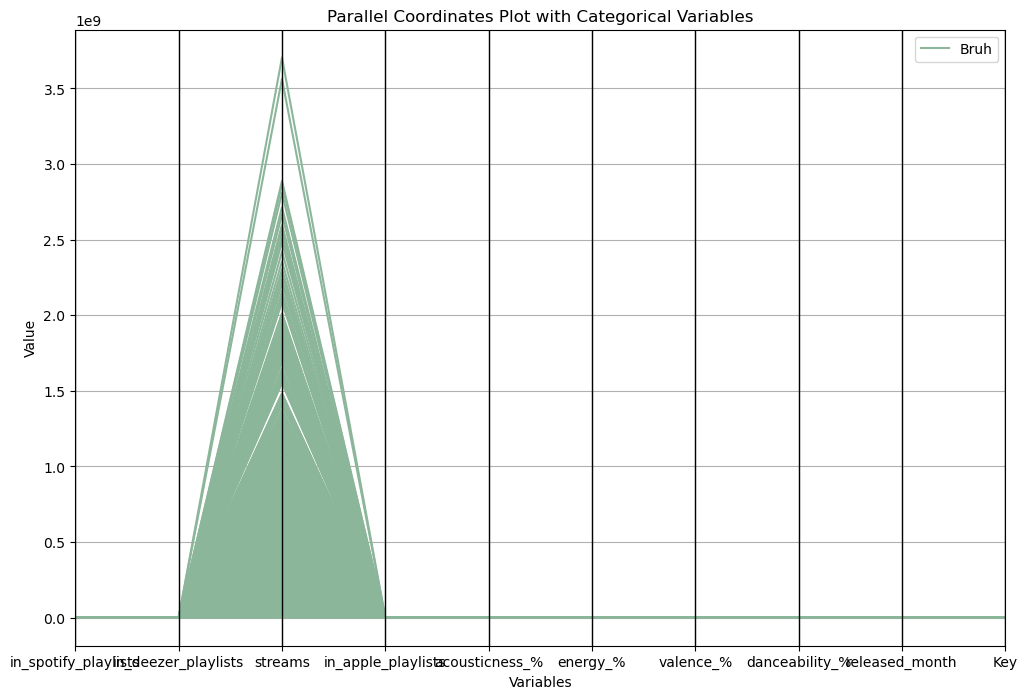

In [39]:
df_parallel = df[A_cols].copy()  

print(df.info())

# df_encoded = pd.get_dummies(df, columns=[C1], prefix='Cat')

# encoded_A_cols = A_cols + [col for col in df_encoded.columns if col.startswith('Cat_')]
# encoded_A_cols.remove('key')
# print(encoded_A_cols)
# df_parallel = df_encoded[encoded_A_cols]

label_encoder = LabelEncoder()

df['Key'] = label_encoder.fit_transform(df[C2])

A_cols_parallel = [A1, A2, A3, A4, A5, A6, A7, A8, C2]

print(A_cols_parallel)

df_parallel = df[A_cols_parallel + ['Key']]

print(df_parallel.info())

plt.figure(figsize=(12, 8))
df_parallel['Class'] = 'Bruh'
parallel_coordinates(df_parallel, class_column='Class') 
plt.title('Parallel Coordinates Plot with Categorical Variables')
plt.xlabel('Variables')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [40]:
export.append(df_parallel.copy(deep=True))

In [41]:
print(A_cols)

['in_spotify_playlists', 'in_deezer_playlists', 'streams', 'in_apple_playlists', 'acousticness_%', 'energy_%', 'valence_%', 'danceability_%', 'key', 'released_month']


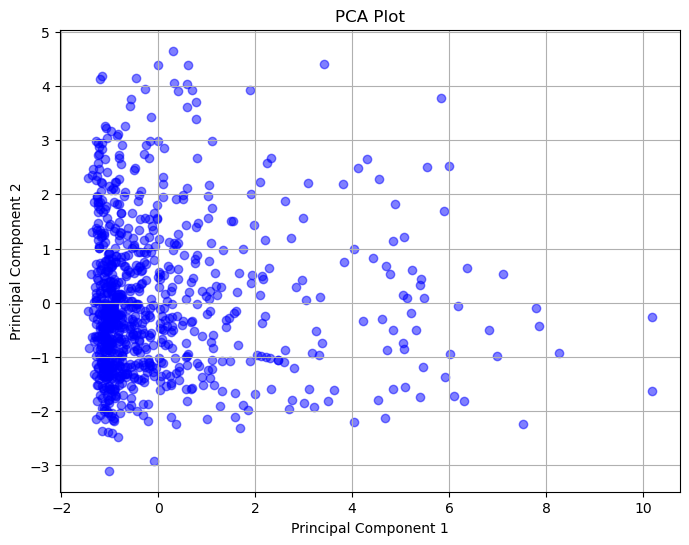

In [42]:
C1_encoded = 'Key'

#A_cols_updated = A_cols_parallel + [C1_encoded]

A_cols_AO = [A1, A2, A3, A4, A5, A6, A7, A8]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[A_cols_AO])

pca = PCA(n_components=2) 
pca_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='blue', alpha=0.5)
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

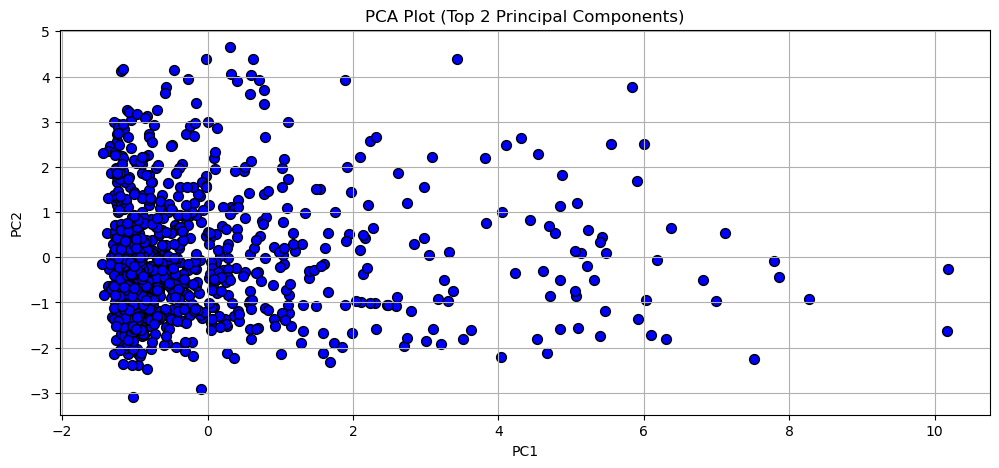

In [43]:
pca = PCA()
pca.fit(df_scaled)

pca_2d = pca.transform(df_scaled)[:, :2]



plt.figure(figsize=(12, 5))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Plot (Top 2 Principal Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

plt.show()

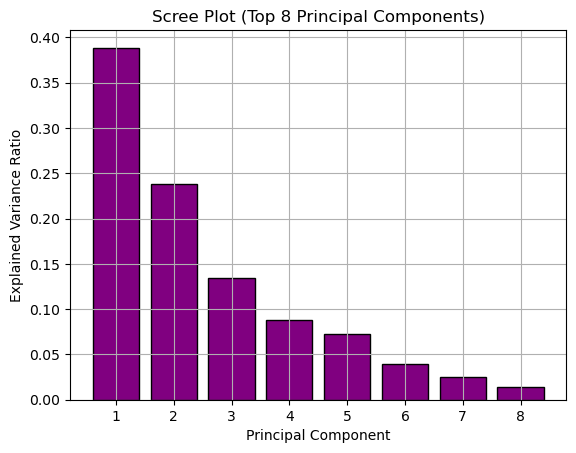

In [44]:
explained_variance = pca.explained_variance_ratio_

plt.bar(np.arange(1, 9), explained_variance[:8], color='purple', edgecolor='k')
plt.title('Scree Plot (Top 8 Principal Components)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

plt.show()

In [45]:
print(explained_variance)


[0.38868997 0.23857967 0.13391607 0.08839279 0.07227143 0.03945433
 0.02488728 0.01380846]


In [46]:
export.append(explained_variance)

In [47]:
#X axis... PC1
export.append(pca_2d[:, 0])

#Y axis... PC2
export.append(pca_2d[:, 1])

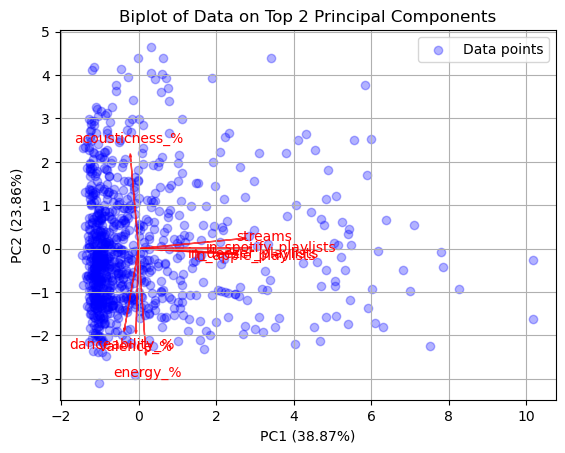

In [48]:
load_vector_dict = {}
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], color='blue', alpha=0.3, label='Data points')

loadings = pca.components_.T * np.sqrt(pca.explained_variance_) * 3

for i, feature in enumerate(A_cols_AO):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.75, head_width=0.05)
    plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, feature, color='r', ha='center', va='center')
    load_vector_dict[feature] = [loadings[i, 0] * 1.2, loadings[i, 1] * 1.2]

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.title("Biplot of Data on Top 2 Principal Components")
plt.grid(True)

plt.legend()
plt.show()


In [49]:
print(load_vector_dict)

{'in_spotify_playlists': [3.4139990330430185, 0.025538822456971925], 'in_deezer_playlists': [2.9642945897440542, -0.12516390345704503], 'streams': [3.2427040533436706, 0.27813210177330167], 'in_apple_playlists': [3.013955942415016, -0.15990735827208993], 'acousticness_%': [-0.2503973570117585, 2.5383260778658365], 'energy_%': [0.22150216581796647, -2.8648942636990853], 'valence_%': [-0.07975933128525133, -2.2649018681288364], 'danceability_%': [-0.43224925021633304, -2.205695376140475]}


In [50]:
export.append(load_vector_dict)

C:\Users\Saatvik Sandal\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


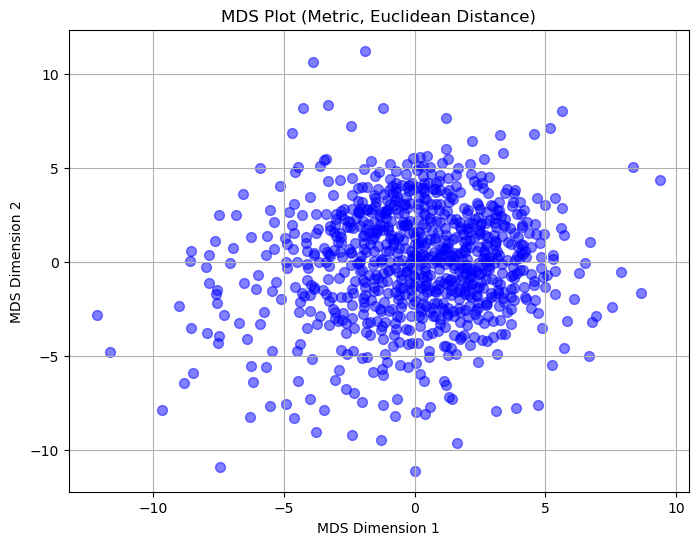

In [51]:
numeric_df = df.select_dtypes(include=['number'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)

distance_matrix = pairwise_distances(df_scaled, metric='euclidean')

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=30)
mds_result = mds.fit_transform(distance_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(mds_result[:, 0], mds_result[:, 1], color='blue', s=50, alpha=0.5)

plt.title("MDS Plot (Metric, Euclidean Distance)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid(True)
plt.show()


C:\Users\Saatvik Sandal\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


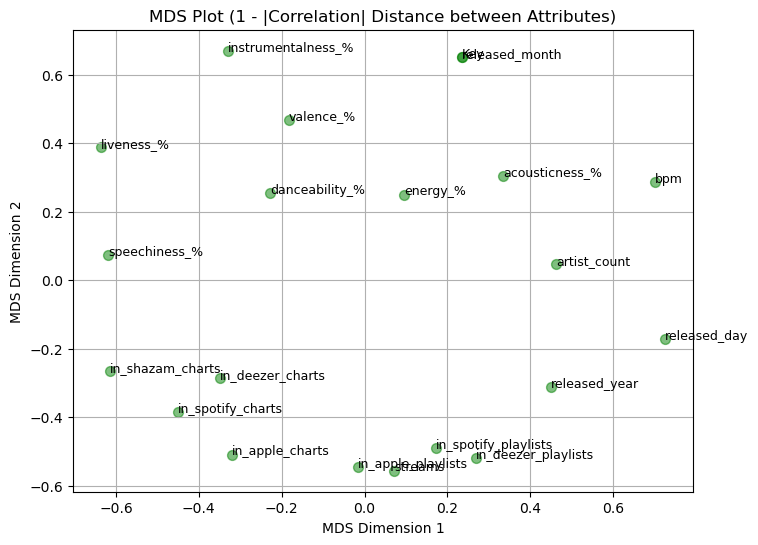

In [52]:
mds_attr_dict = {}
correlation_matrix = numeric_df.corr().abs()
dissimilarity_matrix = 1 - correlation_matrix

mds_attributes = MDS(n_components=2, dissimilarity='precomputed', random_state=30)
mds_attributes_result = mds_attributes.fit_transform(dissimilarity_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(mds_attributes_result[:, 0], mds_attributes_result[:, 1], color='green', s=50, alpha=0.5)

for i, feature_name in enumerate(numeric_df.columns):
    plt.text(mds_attributes_result[i, 0], mds_attributes_result[i, 1], feature_name, fontsize=9)
    mds_attr_dict[feature_name] = [mds_attributes_result[i, 0], mds_attributes_result[i, 1]]

plt.title("MDS Plot (1 - |Correlation| Distance between Attributes)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid(True)
plt.show()


In [53]:
#data
#mds dim 1 
export.append(mds_result[:, 0])

#mds dim 2
export.append(mds_result[:, 1])

#attributes
#mds dim 1
export.append(mds_attributes_result[:, 0])

#mds dim2
export.append(mds_attributes_result[:, 1])

#attribute dictionary
export.append(mds_attr_dict)

In [54]:
print(export)

[                       streams  in_spotify_playlists  in_apple_playlists  \
streams               1.000000              0.787825            0.774445   
in_spotify_playlists  0.787825              1.000000            0.708076   
in_apple_playlists    0.774445              0.708076            1.000000   
in_deezer_playlists   0.600182              0.824438            0.472228   
danceability_%       -0.100702             -0.103279           -0.025617   
valence_%            -0.042787             -0.021648            0.052390   
energy_%             -0.029714              0.039666            0.045562   
acousticness_%        0.010798             -0.056214           -0.050028   

                      in_deezer_playlists  danceability_%  valence_%  \
streams                          0.600182       -0.100702  -0.042787   
in_spotify_playlists             0.824438       -0.103279  -0.021648   
in_apple_playlists               0.472228       -0.025617   0.052390   
in_deezer_playlists       

In [55]:
for item in export:
    print(type(item))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'dict'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'dict'>


In [56]:
export_name = ['corr_df', 'scatter_df', 'parallel_df', 'scree_exp_var', 'X_PC1', 'Y_PC2', 'bi_plot_vector_dict', 
               'data_mds_x_dim1', 'data_mds_y_dim2', 'attr_mds_x_dim1', 'attr_mds_y_dim2', 'attr_mds_dict']

for idx, item in enumerate(export):
    if isinstance(item, pd.DataFrame):
        json_export = item.to_json(orient='records')
        
        with open('data/' + export_name[idx] + '.json', 'w') as f:
            f.write(json_export)
            
    elif isinstance(item, np.ndarray):
        json_export_arr = item.tolist()
        
        with open('data/' + export_name[idx] + '.json', 'w') as f:
            json.dump(json_export_arr, f)
            
    elif isinstance(item, dict):
        json_export_dict = json.dumps(item)
        
        with open('data/' + export_name[idx] + '.json', 'w') as f:
            f.write(json_export_dict)
        
        
        
        

### jsonify csv data and make it a file 

In [57]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Key
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,6
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,2
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,5
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,7
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,4


In [58]:
chart_selector_data = df.to_dict(orient='records')

In [59]:
df.to_json('data/chart_selector_data.json', orient='records', indent=4)

In [60]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          857 non-null    int64
 1   released_year         857 non-null    int64
 2   released_month        857 non-null    int64
 3   released_day          857 non-null    int64
 4   in_spotify_playlists  857 non-null    int64
 5   in_spotify_charts     857 non-null    int64
 6   streams               857 non-null    int64
 7   in_apple_playlists    857 non-null    int64
 8   in_apple_charts       857 non-null    int64
 9   in_deezer_playlists   857 non-null    int32
 10  in_deezer_charts      857 non-null    int64
 11  in_shazam_charts      857 non-null    int64
 12  bpm                   857 non-null    int64
 13  danceability_%        857 non-null    int64
 14  valence_%             857 non-null    int64
 15  energy_%              857 non-null    int64
 16  acousticness_

C:\Users\Saatvik Sandal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saatvik Sandal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Saatvik Sandal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saatvik Sandal\AppData\Roaming\Python\Python311\site-packages\sklearn

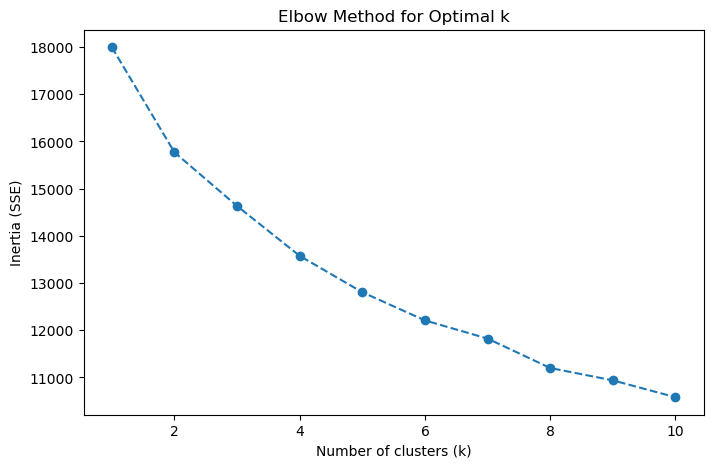

In [61]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [62]:
#k=5 is good 

In [63]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

numeric_df['cluster'] = kmeans.labels_


C:\Users\Saatvik Sandal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saatvik Sandal\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [64]:
numeric_df

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Key,cluster
0,2,2023,7,14,553,147,141381703,43,263,45,10,826,125,80,89,83,31,0,8,4,6,1
1,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,71,61,74,7,0,10,4,2,1
2,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,51,32,53,17,0,31,6,5,1
3,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,55,58,72,11,0,11,15,7,1
4,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,65,23,80,14,63,11,6,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,60,24,39,57,0,8,3,10,4
949,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,42,7,24,83,1,12,6,9,4
950,2,2022,11,3,573,0,73513683,2,0,7,0,0,92,80,81,67,4,0,8,6,10,3
951,3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,82,67,77,8,0,12,5,9,3


In [65]:
numeric_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Key,cluster
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,8.570000e+02,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,1.551925,2018.297550,6.031505,13.739790,5204.997666,11.959160,5.133554e+08,67.383897,51.044341,395.284714,2.619603,54.865811,122.842474,67.273046,51.219370,64.339557,26.644107,1.611435,18.175029,10.396733,5.031505,1.724621
std,0.864634,10.991135,3.567138,9.287652,7944.032885,19.194211,5.714855e+08,86.562405,50.407409,1153.124378,5.770938,150.396554,28.196567,14.653159,23.594579,16.056348,25.688111,8.570734,13.569471,10.090890,3.567138,1.586674
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000
25%,1.000000,2020.000000,3.000000,5.000000,859.000000,0.000000,1.391938e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000,2.000000,0.000000
50%,1.000000,2022.000000,5.000000,13.000000,2226.000000,3.000000,2.849083e+08,34.000000,38.000000,43.000000,0.000000,2.000000,121.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000,4.000000,2.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.740727e+08,85.000000,85.000000,164.000000,2.000000,35.000000,142.000000,78.000000,70.000000,76.000000,42.000000,0.000000,24.000000,12.000000,8.000000,3.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,46.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,11.000000,4.000000


In [66]:
numeric_df.to_json('data/kmeanslabel.json', orient='records', indent=4)